In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_data = pd.read_csv ("movie_metadata.csv")
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [3]:
columns = movie_data.columns
for col in columns:
    
    if movie_data['%s'% (col)].isnull().any()==True:
        print(col)
print(movie_data.color[movie_data.color.isnull()].shape) 
print(movie_data.director_name[movie_data.director_name.isnull()].shape) 
print(movie_data.num_critic_for_reviews[movie_data.num_critic_for_reviews.isnull()].shape )  #fill NaN here
print(movie_data.duration[movie_data.duration.isnull()].shape)  # fill NaN here
print(movie_data.director_facebook_likes[movie_data.director_facebook_likes.isnull()].shape)   # fill NaN here
print(movie_data.actor_3_facebook_likes[movie_data.actor_3_facebook_likes.isnull()].shape )  # fill NaN here
print(movie_data.actor_2_name[movie_data.actor_2_name.isnull()].shape)   
print(movie_data.actor_1_facebook_likes[movie_data.actor_1_facebook_likes.isnull()].shape )  # fill NaN here
print(movie_data.gross[movie_data.gross.isnull()].shape)   # fill Nan here
print(movie_data.actor_1_name[movie_data.actor_1_name.isnull()].shape  ) 
print(movie_data.actor_3_name[movie_data.actor_3_name.isnull()].shape )  
print(movie_data.facenumber_in_poster[movie_data.facenumber_in_poster.isnull()].shape   )# fill NaN here
print(movie_data.plot_keywords[movie_data.plot_keywords.isnull()].shape  ) 
print(movie_data.num_user_for_reviews[movie_data.num_user_for_reviews.isnull()].shape   )# fill NaN here
print(movie_data.language[movie_data.language.isnull()].shape   )
print(movie_data.country[movie_data.country.isnull()].shape) 
print(movie_data.content_rating[movie_data.content_rating.isnull()].shape)  
print(movie_data.budget[movie_data.budget.isnull()].shape) # fill NaN here  
print(movie_data.title_year[movie_data.title_year.isnull()].shape) 
print(movie_data.actor_2_facebook_likes[movie_data.actor_2_facebook_likes.isnull()].shape)  
print(movie_data.aspect_ratio[movie_data.aspect_ratio.isnull()].shape)# fill Nan here



color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
actor_1_name
actor_3_name
facenumber_in_poster
plot_keywords
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
aspect_ratio
(19,)
(104,)
(50,)
(15,)
(104,)
(23,)
(13,)
(7,)
(884,)
(7,)
(23,)
(13,)
(153,)
(21,)
(12,)
(5,)
(303,)
(492,)
(108,)
(13,)
(329,)


In [4]:
movie_data.num_critic_for_reviews=movie_data.num_critic_for_reviews.fillna(movie_data.num_critic_for_reviews.mean())
movie_data.duration = movie_data.duration.fillna(movie_data.duration.mean())
real_director_likes= movie_data.director_facebook_likes[movie_data.director_facebook_likes!=0]
real_director_likes = real_director_likes.dropna()
movie_data.director_facebook_likes=movie_data.director_facebook_likes.fillna(real_director_likes.mean())
movie_data.actor_3_facebook_likes= movie_data.actor_3_facebook_likes.fillna(movie_data.actor_3_facebook_likes.mean())

gross_real_values= movie_data.gross[movie_data.gross !=0]
gross_real_values= gross_real_values.dropna()
movie_data.gross= movie_data.gross.fillna(gross_real_values.mean())

movie_data.facenumber_in_poster= movie_data.facenumber_in_poster.fillna(movie_data.facenumber_in_poster.mean())
movie_data.num_user_for_reviews= movie_data.num_user_for_reviews.fillna(movie_data.num_user_for_reviews.mean())
movie_data.budget= movie_data.budget.fillna(movie_data.budget.mean())
movie_data.budget= movie_data.budget/1000000
movie_data.aspect_ratio= movie_data.aspect_ratio.fillna(movie_data.aspect_ratio.mean())
movie_data=movie_data.dropna().reset_index(drop=True)


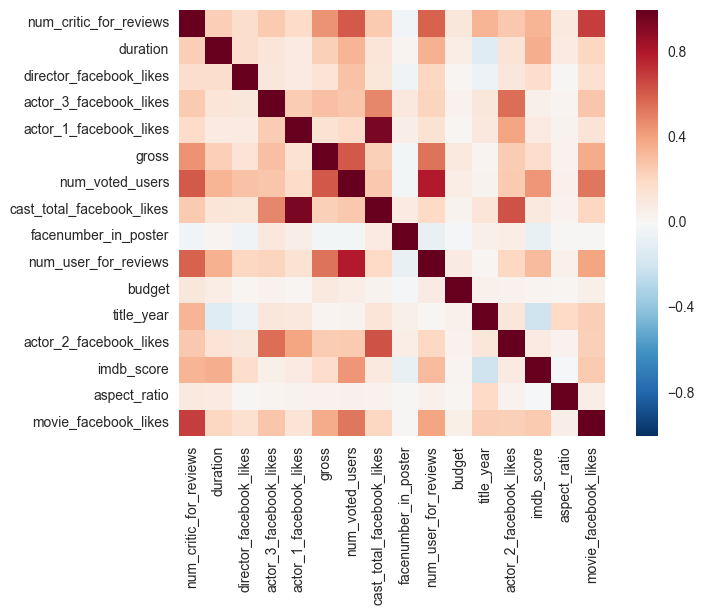

In [5]:
basic_matrix=movie_data.corr()
sns.heatmap(basic_matrix, square=True)
plt.show()

In [6]:
movie_data = movie_data.drop(['actor_1_facebook_likes'],axis=1)
movie_data = movie_data.drop(['movie_imdb_link'], axis=1)
movie_data.shape

(4581, 26)

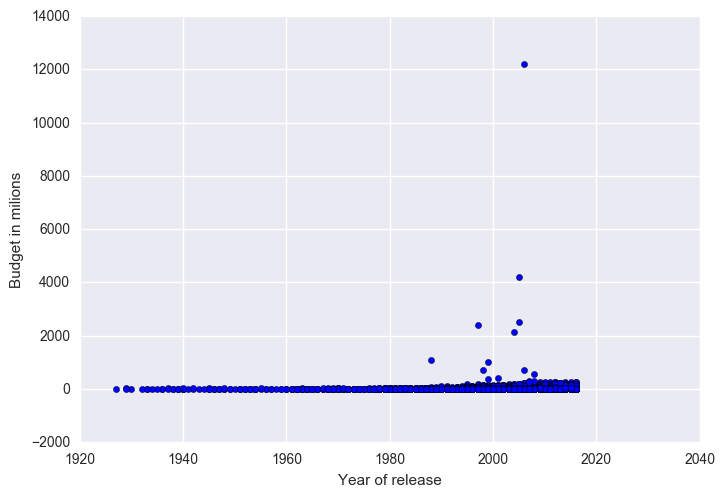

987     The Messenger: The Story of Joan of Arc 
1300                                  Red Cliff 
2246                          Princess Mononoke 
2257                                   Steamboy 
2880                                   The Host 
2897                                   Fateless 
2962                     Kabhi Alvida Naa Kehna 
3178                   The Legend of Suriyothai 
3278                                      Akira 
3657                                      Tango 
3665                             Lady Vengeance 
4231                              Godzilla 2000 
Name: movie_title, dtype: object


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
plt.scatter(movie_data.title_year,movie_data.budget)
plt.xlabel("Year of release")
plt.ylabel("Budget in milions")
plt.show()
odd_movies= movie_data[movie_data.budget>380]
print(odd_movies.movie_title)


movie_data.budget.loc[movie_data.budget==390.000000]=85
movie_data.budget.loc[movie_data.budget==553.632000]=36
movie_data.budget.loc[movie_data.budget==2400.000000]=23.5
movie_data.budget.loc[movie_data.budget==2127.519898]=22
movie_data.budget.loc[movie_data.budget==12215.500000]=40
movie_data.budget.loc[movie_data.budget==2500.000000]=8.5
movie_data.budget.loc[movie_data.budget==700.000000]=7.4
movie_data.budget.loc[movie_data.budget==400.000000]=10.1
movie_data.budget.loc[movie_data.budget==1100.000000]=8
movie_data.budget.loc[movie_data.budget== 700.000000]=4.206
movie_data.budget.loc[movie_data.budget== 4200.000000]=4.5
movie_data.budget.loc[movie_data.budget==1000.000000]=8.3





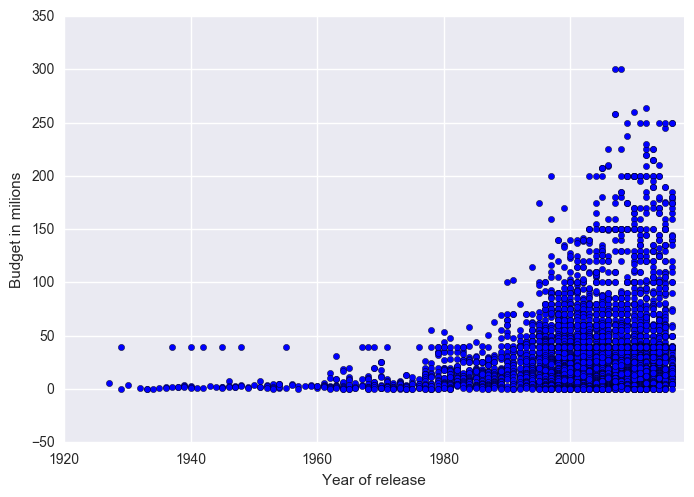

In [8]:
plt.scatter(movie_data.title_year,movie_data.budget)
plt.xlim(1920,2018)
plt.xlabel("Year of release")
plt.ylabel("Budget in milions")
plt.show()

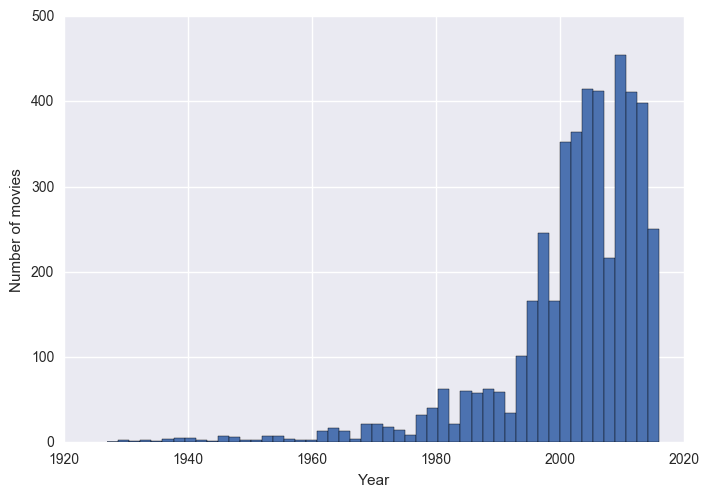

In [15]:
plt.hist(movie_data.title_year, bins= 50)
plt.xlim(1920,2020)
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

In [12]:
movie_data.language.unique()
movie_data.gro

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh', 'Cantonese',
       'Japanese', 'German', 'Aramaic', 'Italian', 'Dutch', 'Dari',
       'Hebrew', 'Mongolian', 'Korean', 'Thai', 'Bosnian', 'None',
       'Hungarian', 'Portuguese', 'Danish', 'Norwegian', 'Czech',
       'Swedish', 'Zulu', 'Polish', 'Arabic', 'Vietnamese', 'Indonesian',
       'Romanian', 'Persian', 'Greek'], dtype=object)